In [1]:
pwd

'/home/username/ml-test'

In [2]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

In [93]:
# df_bubble = pd.read_excel('实验数据-各流型的液膜厚度.xlsx', sheetname='Sheet1')
df_bubble = pd.read_excel('实验数据-各流型的液膜厚度.xlsx', sheet_name='WaveFlow', header=None)

df_bubble.head()

,0,1,2
0,0.000,1.03999,0.26502
1,0.001,1.03805,0.26523
2,0.002,1.03771,0.26470
3,0.003,1.03796,0.26568
4,0.004,1.03779,0.26776


In [58]:
df_bubble.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  float64
 1   1       10000 non-null  float64
 2   2       10000 non-null  float64
dtypes: float64(3)
memory usage: 234.5 KB


In [59]:
df_bubble.describe()

,0,1,2
count,10000.000000,10000.000000,10000.000000
mean,4.999500,1.037586,0.202631
std,2.886896,0.001418,0.034633
min,0.000000,1.032750,0.128000
25%,2.499750,1.036610,0.178890
50%,4.999500,1.037540,0.198030
75%,7.499250,1.038470,0.221530
max,9.999000,1.043830,0.317900


In [94]:
df_bubble.columns=['time/s', 'full', 'wave']

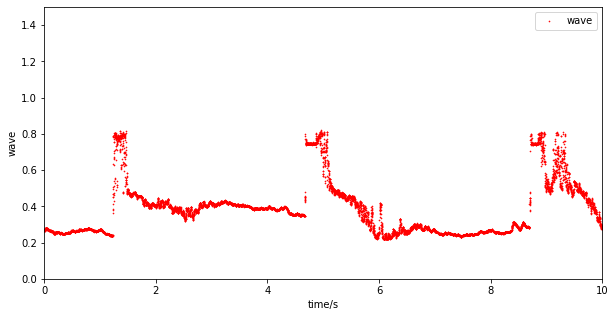

In [95]:
df_bubble.plot(kind='scatter', x='time/s', y='bubble', xlim=(0, 10), ylim=(0, 1.5), s=0.4, figsize=(10, 5), 
               label="bubble", c='red')

In [96]:
df_bubble.to_csv('wave_flow.csv')

In [66]:
df_test = pd.read_csv('annular_flow.csv', index_col=0)
df_test.head()

,time/s,full,annular
0,0.000,1.03999,0.28295
1,0.001,1.03805,0.31168
2,0.002,1.03771,0.31659
3,0.003,1.03796,0.28096
4,0.004,1.03779,0.25717


In [97]:
clear

In [102]:
df_bubble.mean()

time/s    4.999500
full      1.037586
wave      0.386953
dtype: float64

In [104]:
df_bubble.describe()

,time/s,full,wave
count,10000.000000,10000.000000,10000.000000
mean,4.999500,1.037586,0.386953
std,2.886896,0.001418,0.145423
min,0.000000,1.032750,0.219280
25%,2.499750,1.036610,0.264700
50%,4.999500,1.037540,0.378770
75%,7.499250,1.038470,0.432175
max,9.999000,1.043830,0.819590


In [105]:
type(df_bubble.describe())

pandas.core.frame.DataFrame

# important

In [113]:
df_bubble.describe().loc['mean']['full']

1.037586143

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(df_festure_target_dataset_cat_tr, df_target_dataset_cat)

import numpy as np
# Evaluate System on the Test Set
X_test = test_set.drop('label', axis=1)
y_test = test_set['label'].copy()

X_test_prepared = num_pipeline.transform(X_test)
final_predictions = lin_reg.predict(X_test_prepared)
print(y_test[:5].values)
print(final_predictions[:5])
final_predictions = np.ceil(final_predictions - 0.5)
print(final_predictions[:5])

num = 0
print(final_predictions)
print(y_test.values)
for i,j in zip(final_predictions, y_test):
#     print(i, j)
    if abs(i - j) <= 0.1:
        num += 1
print('accuracy', num/len(y_test), num, '/', len(y_test))


# Plot the Result
import matplotlib.pyplot as plt
plt.scatter(final_predictions, y_test, alpha=0.4)
plt.plot([0, 6], [0, 6], 'g-')
plt.xlabel('predictions')
plt.ylabel('real values')
plt.show